In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import piplite
await piplite.install('seaborn')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Fruit classification challenge!

**Data**:
<br>
We provide a training dataset comprising 10’000 photoplethysmography (PPG) signals sampled
at 10 Hz (30-second duration each). Each of these 10’000 PPG recordings has a label
(fruit name) that can be used to train an ML model.

**Goal**:<br>
The idea is to :
1. Design an ML-based solution to classify these PPG signals into the different fruits and
train it using the training dataset.
2. Generate the outputs for the 10’000 recordings of the test dataset and upload the results in the shared drive by 12:30h.


Recall common steps to tackle a Machine Learning challenge:
1. Exploratory Data Analysis
    -  Check the type of data we have
    -  Check data and label distribution
    -  Visualizations (scatterplots, histograms, boxplots, ...)
2. Feature selection:
    - Assess which features to use from the data
    - Iterative process, usually trial-error
3. Model selection
    - Try different models and evaluate them via train/validation split or k-fold cross validation
    - Select best candidate or few best candidates
4. Model evaluation
    - Assess the performance of the best model on a test dataset/submit the results on the test dataset
    

Let's load the data, make sure to check you are correctly handling the headers of the datasets!

In [2]:
data_raw = pd.read_csv('quiz_train_data.csv',header=None)
fruits_raw = pd.read_csv('quiz_train_labels.csv', header=None)

# Exploratory data analysis (EDA)

First, let's convert the data to a 2D numpy array, and the fruits (labels) to a 1D numpy array.

In [3]:
data = data_raw.values
fruits = fruits_raw.values.flatten()

To better visualize the distribution of our labels, let's make a bar plot with the total counts of each different fruit (label). **Hint**: you can use the [sns](https://seaborn.pydata.org/generated/seaborn.countplot.html) function from seaborn.

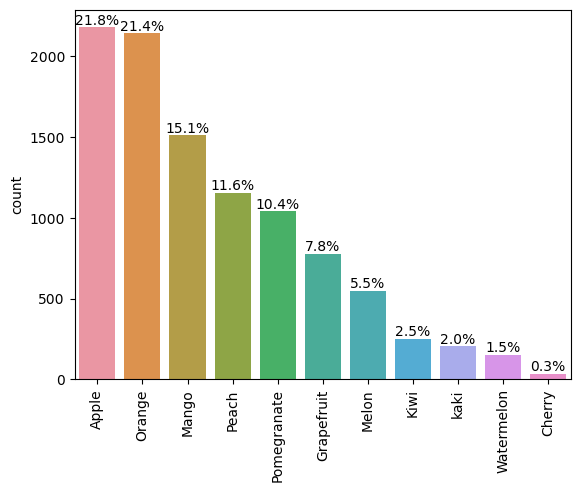

In [4]:
order=['Apple','Orange','Mango','Peach','Pomegranate','Grapefruit','Melon','Kiwi','kaki','Watermelon','Cherry']
ax = sns.countplot(x=fruits, order=order)
ncount = len(fruits)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')  
plt.xticks(rotation=90)
plt.savefig('hist_train.png')
plt.show()

Now let's see how the data signals look like, plot the first one!

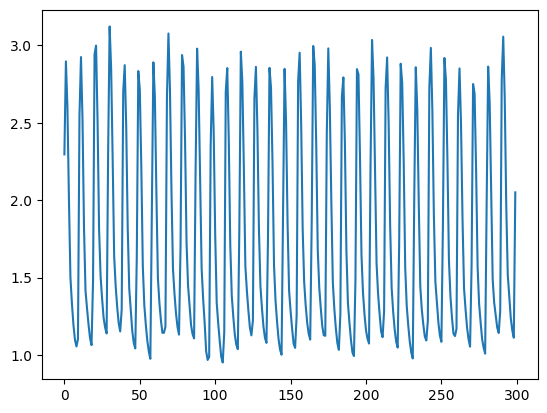

In [5]:
plt.plot(data[0])

We can now visualize different examples for each of the different fruits

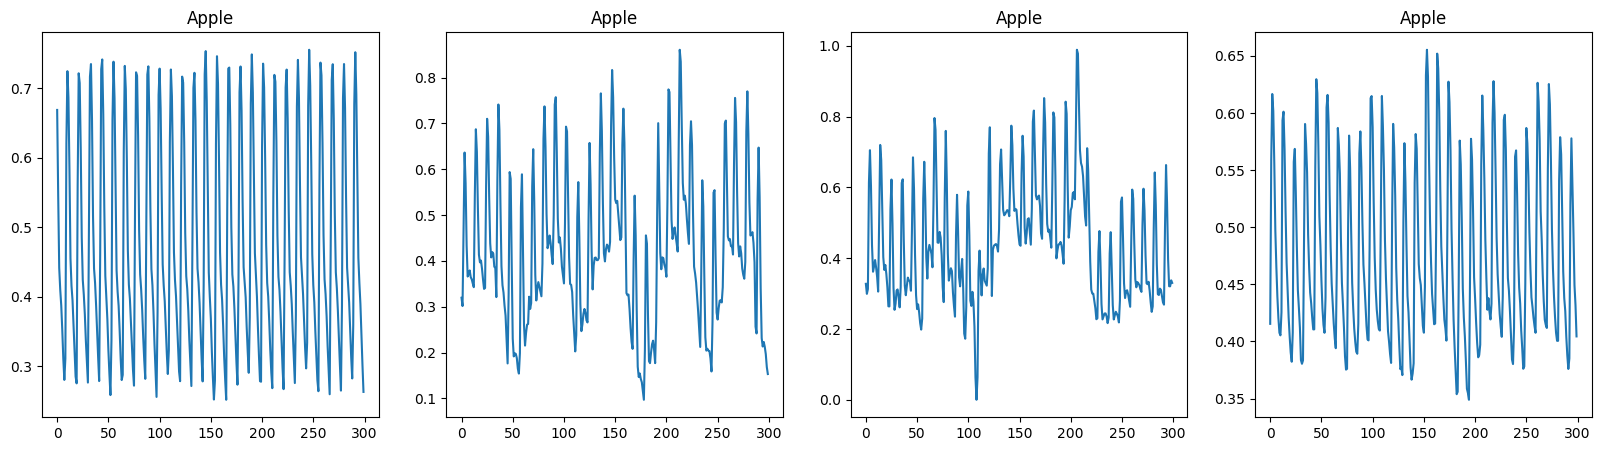

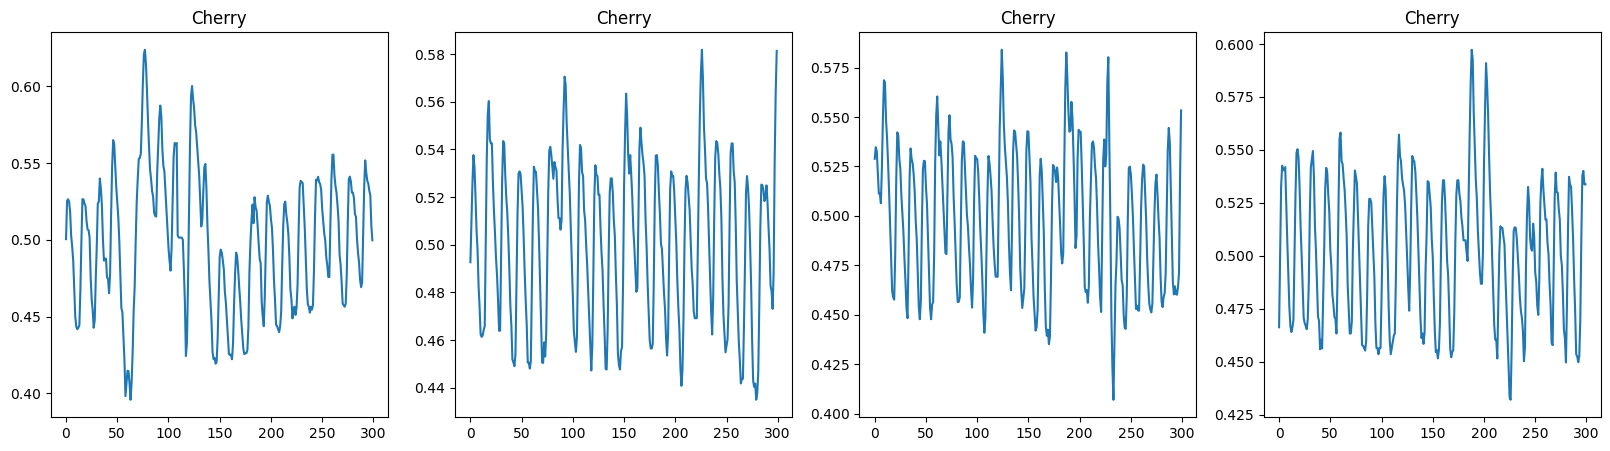

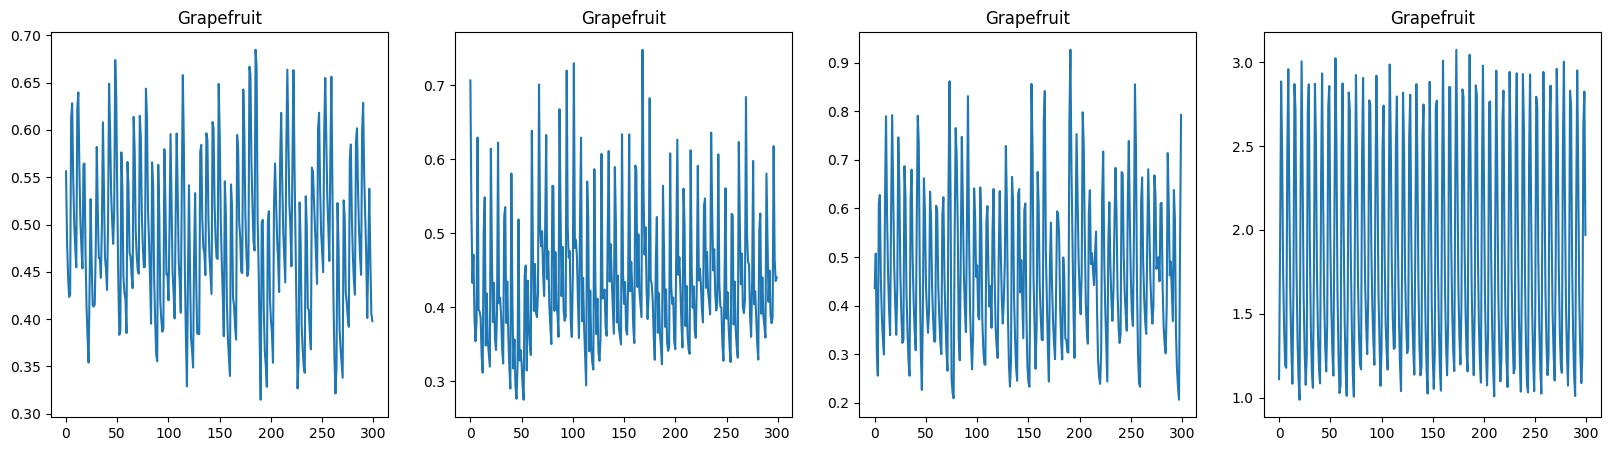

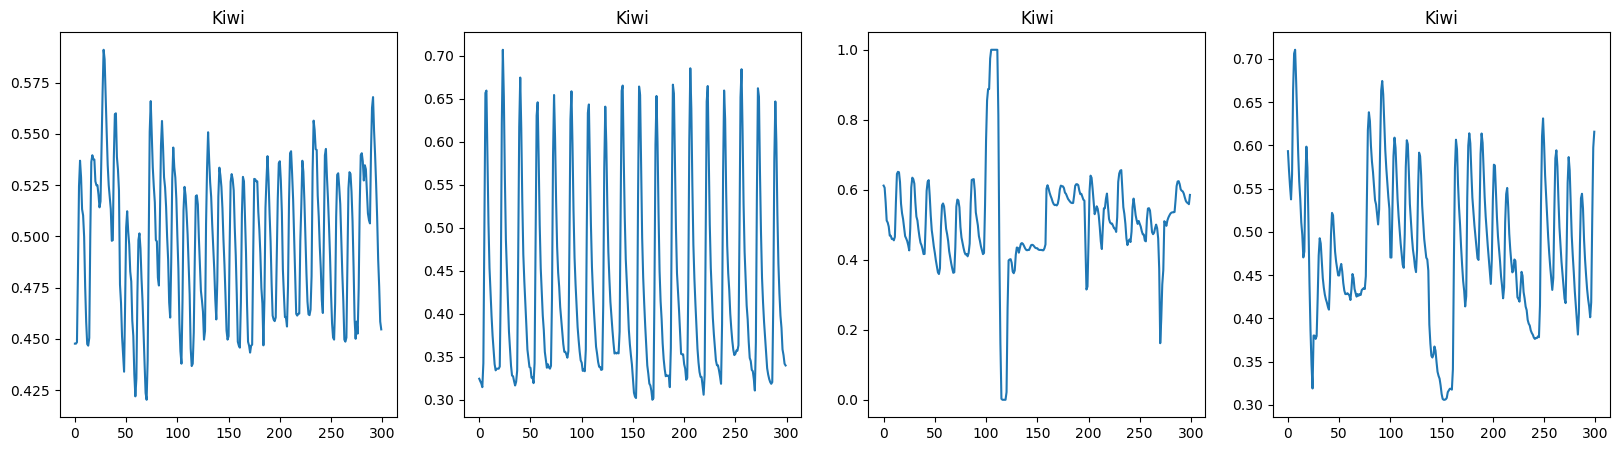

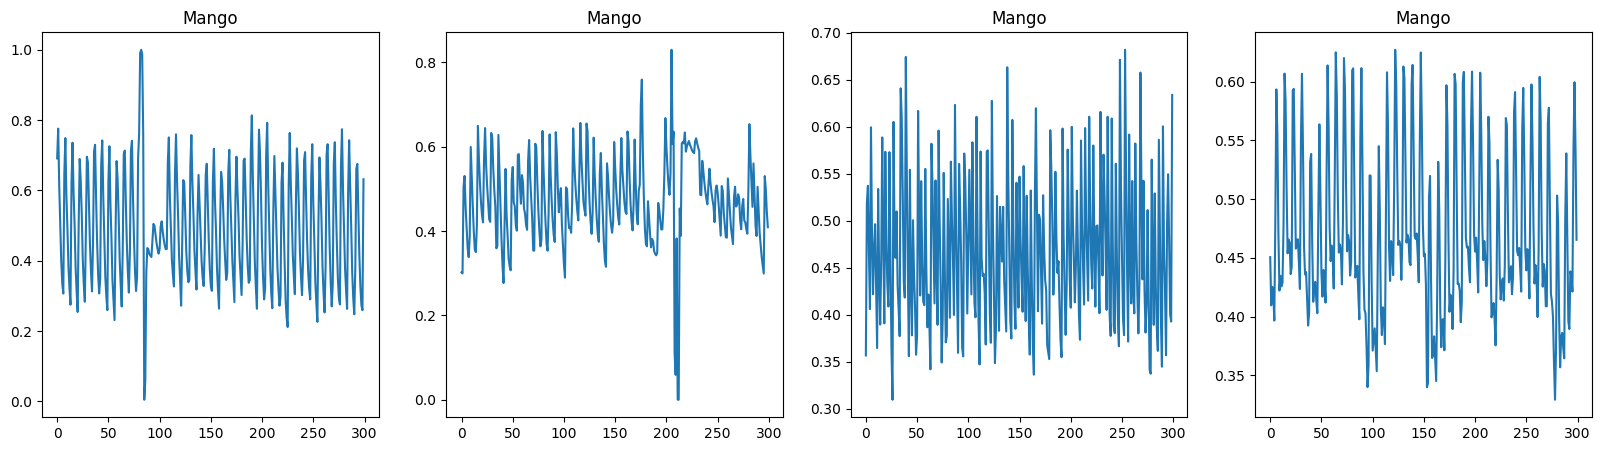

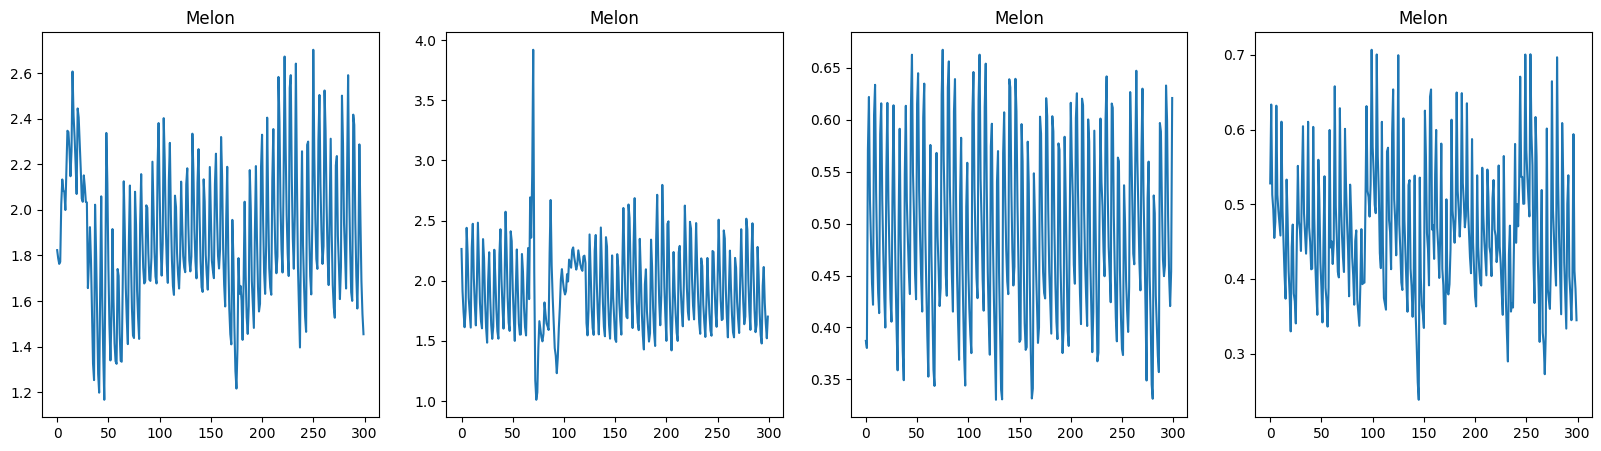

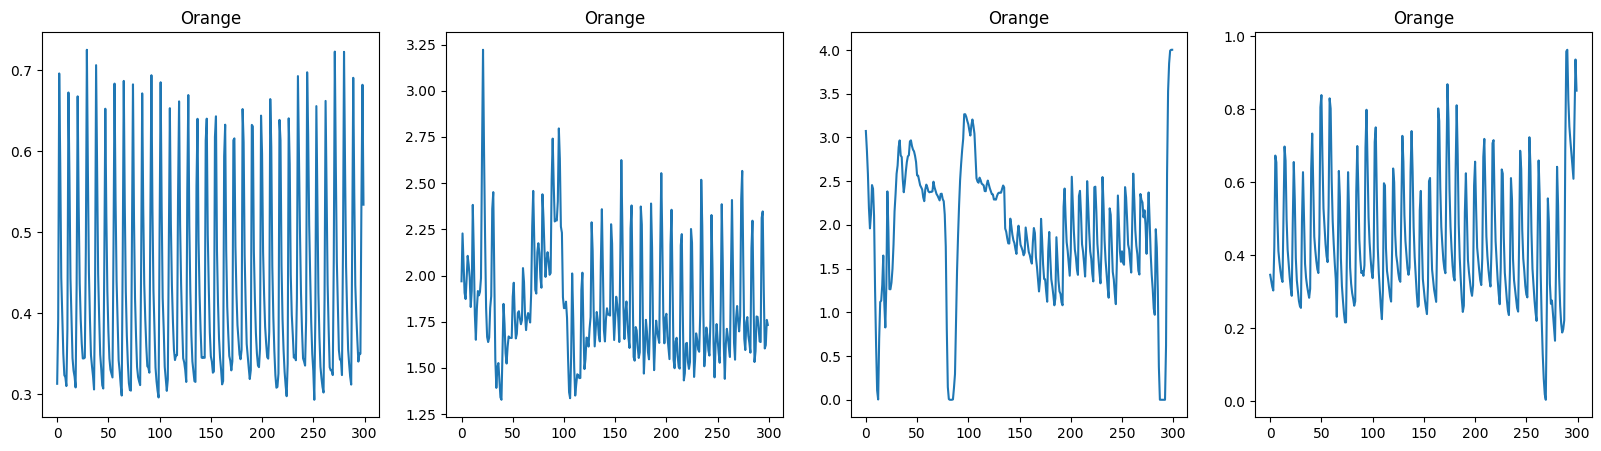

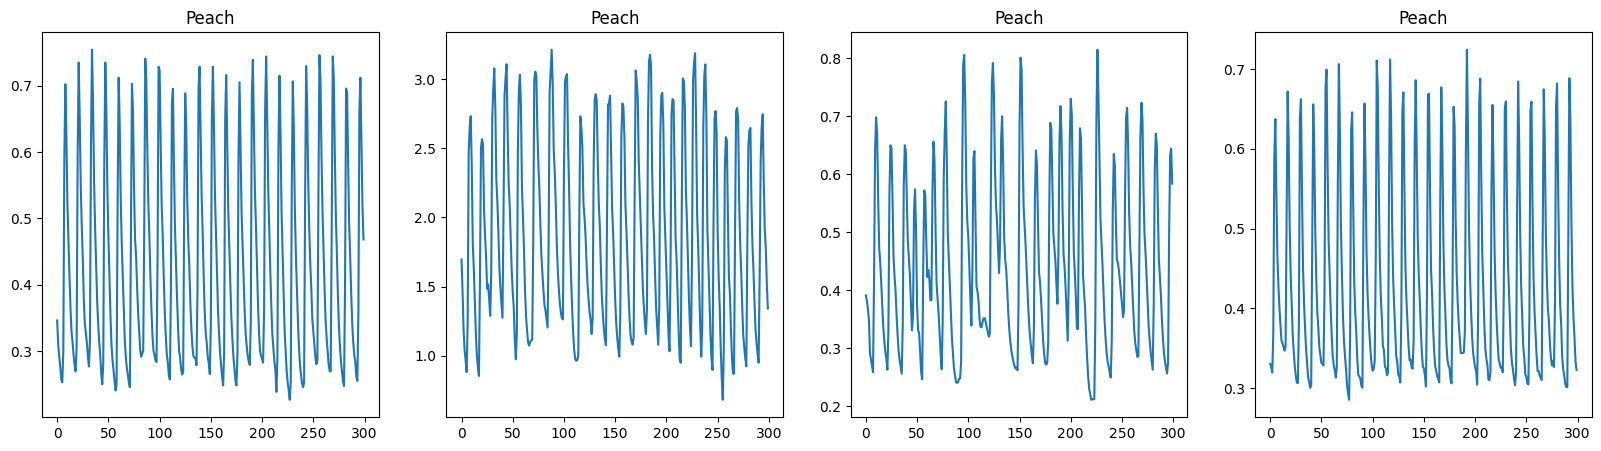

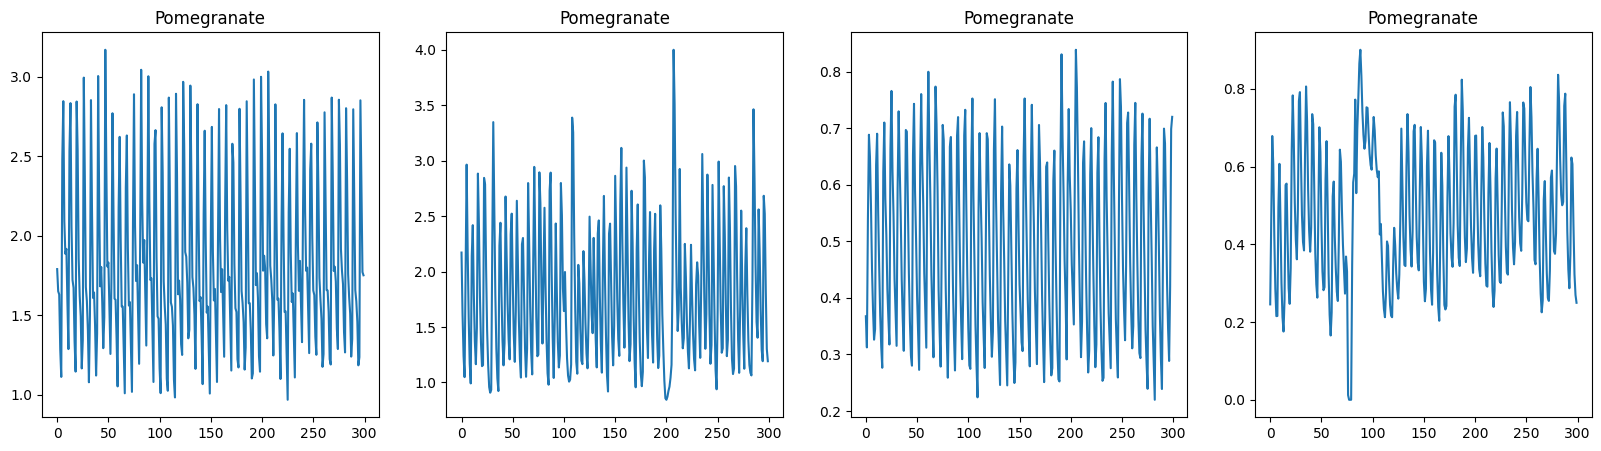

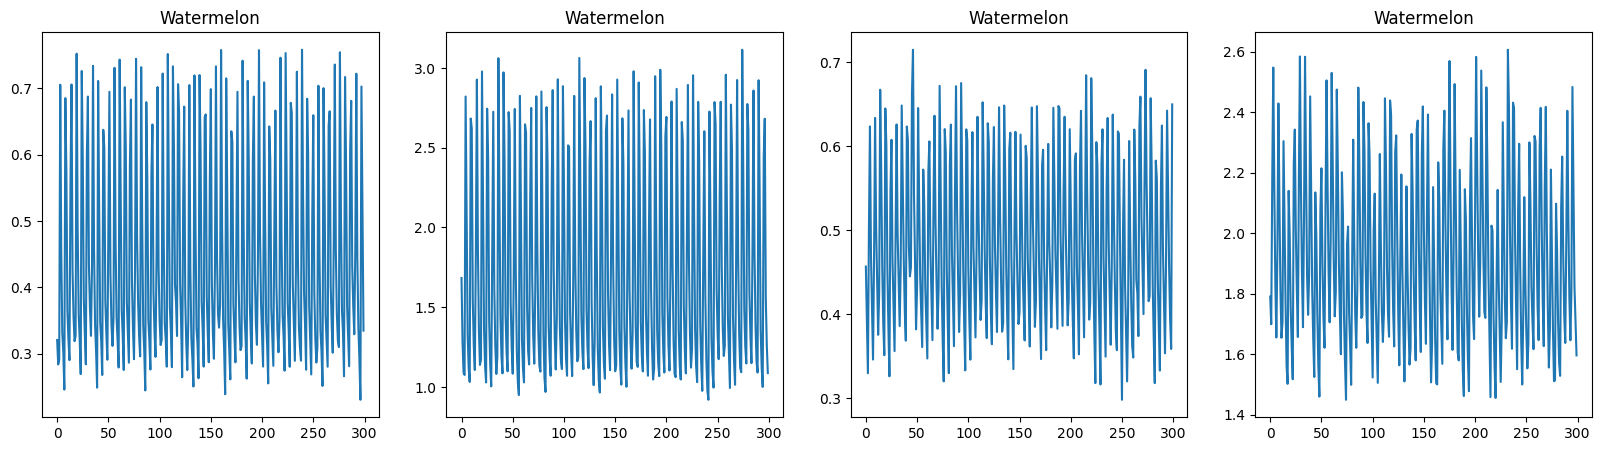

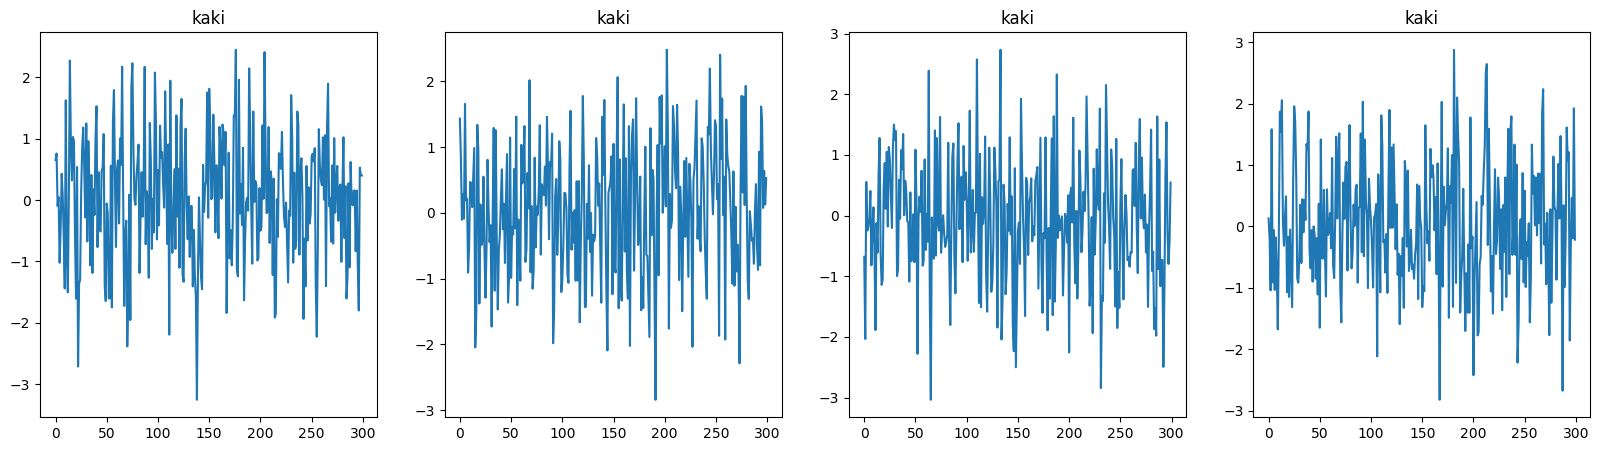

In [6]:
# get all fruit names
fruit_names = np.unique(fruits)

# Plot some examples of time series for each of the fruits
max_n = 4
for idx in range(len(fruit_names)):
    fig, ax = plt.subplots(1, max_n, figsize=(5*max_n, 5))
    
    # select one fruit type
    fruit = fruit_names[idx] 
    
    # Select, at random, 4 examples of that fruit
    fruit_indices = np.where(np.array(fruits) == fruit)[0]
    random.shuffle(fruit_indices)
    fruit_indices = fruit_indices[0:max_n]
    for n_fruit in range(len(fruit_indices)):
        n = fruit_indices[n_fruit] 
        ax[n_fruit].plot(data[n])
        ax[n_fruit].set_title(fruit)
        
    plt.show()

Finally, for each different fruit, let's print some statistics such as the average mean, std, min and max of the corresponding signals

In [7]:
for fruit in fruit_names:
    avg_mean = np.mean([np.mean(data[idx]) for idx in range(len(fruits)) if fruits[idx]==fruit])
    avg_std = np.mean([np.std(data[idx]) for idx in range(len(fruits)) if fruits[idx]==fruit])
    avg_min = np.mean([np.min(data[idx]) for idx in range(len(fruits)) if fruits[idx]==fruit])
    avg_max = np.mean([np.max(data[idx]) for idx in range(len(fruits)) if fruits[idx]==fruit])
    
    print(fruit)
    print('Average mean %f, std %f, min %f max %f' % (avg_mean, avg_std, avg_min, avg_max))

Apple
Average mean 0.647044, std 0.183763, min 0.308338 max 1.105695
Cherry
Average mean 0.496885, std 0.040806, min 0.412369 max 0.601794
Grapefruit
Average mean 0.680918, std 0.192383, min 0.329056 max 1.151279
Kiwi
Average mean 0.750671, std 0.206102, min 0.396365 max 1.231222
Mango
Average mean 0.719809, std 0.207683, min 0.326830 max 1.250266
Melon
Average mean 0.689259, std 0.196323, min 0.344570 max 1.170305
Orange
Average mean 0.754717, std 0.214024, min 0.346069 max 1.299549
Peach
Average mean 0.603742, std 0.173463, min 0.293953 max 1.014947
Pomegranate
Average mean 0.705971, std 0.199998, min 0.326899 max 1.223019
Watermelon
Average mean 0.777427, std 0.223127, min 0.431512 max 1.300770
kaki
Average mean -0.000614, std 0.996109, min -2.873411 max 2.828344


# Train-validation split 

First let's create the X (predictors) and y (targets or labels) for our problem. We will start with a minimal example, where X will be the mean value of each of the signals, and y just the name of the fruit. **Note**: X should be 2D.

In [8]:
X = np.expand_dims(data.mean(axis=1),1)
y = fruits

To be able to feed this data into a Machine Learning model later, we need y to be numerical (differente integer corresponding to each different category or fruit). Use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to do the transformation! 

In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Let's do the train/validation split with a validation share of 20%

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape, X_val.shape)

(8000, 1) (2000, 1)


# Model training

Initialize and fit a LogisticRegression model, use a maximum number of iterations of 1000

In [11]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Make the predictions on the validation set, and report the accuracy (share of correctly classified fruits)

In [12]:
predictions = model.predict(X_val)
accuracy = np.mean(predictions==y_val)
print("Validation accuracy is %.2f" % accuracy)

Validation accuracy is 0.27


# Submit your results on test set

We first load the test data in the proper format

In [13]:
test_data_raw = pd.read_csv('quiz_test_data.csv',header=None)
test_data = data_raw.values

We generate the X_test matrix, in this case with the only predictor we used, the mean of the signals. Not that for more complex models where more predictors share used, this should be updated accordingly.

In [14]:
X_test = np.expand_dims(test_data.mean(axis=1),1)

Generate the predictions. Note the predictions will be integers. Transform them back to the corresponding fruit names for the final submission. **Hint**: check the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) documentation.

In [15]:
test_predictions = model.predict(X_test)
test_fruit_predictions = label_encoder.inverse_transform(test_predictions)

Now you are ready to generate the output .txt file and share it. You can upload the final solutions at the end of the day in the shared drive. The format should be 'results_name_surname.txt'.

In [16]:
file_path = 'results_enzo_dubois.txt'
np.savetxt(file_path, test_fruit_predictions,fmt='%s')

# Next steps, now is your turn!

Some ideas that you can try to improve the results:
- Use more statistic from the signals as features (std, min, max, skewness, quantiles, ...)
- Try to exploit temporal information from the signals (is there a periodicity?), it might be useful to peak detection or fourier techniques to incorporate temporal information in our features...
- Use other models that we have already seen (random forests, boosting algorithms, MLP, other deep learning models, ...?)
- Model ensembling (merge predictions from different models to generate an "ensembled" prediction)
- Check out external libraries designed for these kind of use cases such as [tsai](https://timeseriesai.github.io/tsai/) (more advanced)

**Note:** If you don't have enough computing power for some solutions you can try the CPU/GPUs of [google collab](https://colab.research.google.com/?hl=es)